# BotW Any% Livesplit Attempt and Segment Analysis for Wolhaiksong's Splits

## Setup

In [1154]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [1155]:
# Read the csv files
df_attempt_history = pd.read_csv("Data/attempt_history.csv")
df_segment_history = pd.read_csv("Data/segment_history.csv")

## Attempt History Cleaning

In [1156]:
# Show attempt history
df_attempt_history.head(203)

,Attempt ID,Started,Ended,Time
0,1,01 Feb 20 18:42:29,01 Feb 20 18:45:19,NaN
1,2,01 Feb 20 18:46:35,01 Feb 20 19:03:34,NaN
2,3,01 Feb 20 19:03:51,01 Feb 20 19:03:59,NaN
3,4,01 Feb 20 19:04:10,01 Feb 20 19:04:13,NaN
4,5,01 Feb 20 19:05:23,01 Feb 20 19:07:43,NaN
...,...,...,...,...
198,199,28 May 20 20:38:33,28 May 20 20:45:08,NaN
199,200,28 May 20 20:46:36,28 May 20 20:53:15,NaN
200,201,28 May 20 20:55:46,28 May 20 21:08:12,NaN
201,202,29 May 20 20:26:43,NaN,00:37:57.96


In [1157]:
# Show column data types
df_attempt_history.dtypes

Attempt ID     int64
Started       object
Ended         object
Time          object
dtype: object

We can see that runs that do not finish a `NaN` time value. Therefore, we need to drop all runs that do not finish from the `df_attempt_history` dataframe and that have missing `Started` or `End` data. We also don't care for the `Started` and `Ended` columns, so we can remove them.

In [1158]:
# Drop columns
df_attempt_history = df_attempt_history.drop(columns=["Started", "Ended"])

# Remove NA values
df_attempt_history = df_attempt_history.dropna().reset_index().drop(columns=["index"])

df_attempt_history

,Attempt ID,Time
0,47,00:31:49.55
1,54,00:35:57.99
2,66,00:29:33.57
3,68,00:34:05.34
4,72,00:28:01.53
...,...,...
61,2044,00:32:43.67
62,2046,00:27:01.22
63,2049,00:27:58.34
64,2050,00:27:34.70


Before converting the `Time` data into a numeric form, it would be best to save the data as is because we can easily interpret time in this format.

In [1159]:
# Save the dataframe as a csv file
df_attempt_history.to_csv("Data/attempt_history_hhmmssms.csv")

The `Time` column is still being treated as an object, without a standard type. As datetime data is inappropriate to perform any substantial analysis on, it is best that we convert it into a numerical data type such as `float` to represent the number of seconds it took to complete the speedrun.

Let's create a function called `convert_raw_to_seconds` as we will use this method repetitively throughout this project during the cleaning stage.

In [1160]:
def convert_raw_to_seconds(cols : list, df : pd.DataFrame):
    """
    A function that converts and edits the raw time data from Livesplit in a DataFrame to seconds.

    :returns: None
    """
    
    # Loop through each columns
    for col in cols:
        # Check that the column is a string
        assert type(col) == str, "List of columns must contain all strings."
        # Loop through each row
        for i in df.index:
            if type(df.at[i, col]) == str:
                # Get a list of all numbers split by :
                time = str(df.at[i, col]).split(":")
                
                # Calculate seconds = 60*minutes + seconds + milliseconds/100
                seconds = 60*float(time[1]) + float(time[2].split(".")[0]) + float(time[2].split(".")[1])/100
                df.at[i, col] = float(seconds)

In [1161]:
# Convert time to seconds
convert_raw_to_seconds(["Time"], df_attempt_history)

# Rename Time column
df_attempt_history = df_attempt_history.rename(columns={"Attempt ID": "Attempt ID", "Time": "End Time"})

df_attempt_history

,Attempt ID,End Time
0,47,1909.55
1,54,2157.99
2,66,1773.57
3,68,2045.34
4,72,1681.53
...,...,...
61,2044,1963.67
62,2046,1621.22
63,2049,1678.34
64,2050,1654.7


`Completed Run Time (seconds)` is still an object, let's create a function that converts this into a numeric column as we will need to use this repetitively in the future.

In [1162]:
def convert_obj_to_numeric(cols : list, df : pd.DataFrame):
    """
    Converts inputted columns labelled as objects to numeric values.

    :returns: None
    """

    for col in cols:
        df[col] = pd.to_numeric(df[col])

In [1163]:
# Convert Completed Run Time (seconds) column from object to numeric
convert_obj_to_numeric(["End Time"], df_attempt_history)

df_attempt_history.dtypes

Attempt ID      int64
End Time      float64
dtype: object

## Segment History Cleaning

In [1164]:
# Show segment history
df_segment_history

,Attempt ID,Stasis,Cryonis,Magnesis,Bombs,Glider,Castle,Blights,Calamity,Done
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,00:04:22.03,00:03:41.98,00:02:26.88,00:03:43.86,00:02:04.22,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2058,2059,00:04:15.57,00:03:20.72,00:02:31.29,00:02:29.38,00:01:42.01,NaN,NaN,NaN,NaN
2059,2060,00:04:16.79,00:03:24.79,00:02:44.05,NaN,NaN,NaN,NaN,NaN,NaN
2060,2061,00:04:15.04,00:03:31.75,00:02:30.25,NaN,NaN,NaN,NaN,NaN,NaN
2061,2062,00:04:11.62,00:03:21.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can observe that the `df_segment_history` dataframe includes the segment time for each attempt with respect to its `Attempt ID`. First, we should remove any runs that reset at `Stasis`. That means, its `Statis` value is `NaN`.

In [1165]:
# Check stasis segment for NaN values and remove those rows
df_segment_history = df_segment_history.dropna(subset=["Stasis"]).reset_index().drop(columns=["index"])

df_segment_history

,Attempt ID,Stasis,Cryonis,Magnesis,Bombs,Glider,Castle,Blights,Calamity,Done
0,2,00:04:22.03,00:03:41.98,00:02:26.88,00:03:43.86,00:02:04.22,NaN,NaN,NaN,NaN
1,8,00:04:20.90,00:03:54.39,00:03:18.57,00:05:12.69,00:01:40.39,NaN,NaN,NaN,NaN
2,11,00:04:20.90,00:03:59.00,00:02:39.90,00:02:34.31,00:01:55.13,NaN,NaN,NaN,NaN
3,16,00:04:24.89,00:03:22.85,00:03:22.24,00:02:26.92,NaN,NaN,NaN,NaN,NaN
4,17,00:04:20.90,00:03:22.85,00:02:39.92,00:02:38.27,00:02:30.26,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
883,2058,00:04:16.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,2059,00:04:15.57,00:03:20.72,00:02:31.29,00:02:29.38,00:01:42.01,NaN,NaN,NaN,NaN
885,2060,00:04:16.79,00:03:24.79,00:02:44.05,NaN,NaN,NaN,NaN,NaN,NaN
886,2061,00:04:15.04,00:03:31.75,00:02:30.25,NaN,NaN,NaN,NaN,NaN,NaN


Again, before converting any of the columns data into a numeric form and split up this dataframe into two, seperate formats it would be best to save the data as is because we can easily interpret time in its current format.

In [1166]:
# Save the file
df_segment_history.to_csv("Data/segment_history_hhmmssms")

Using similar code as we did for `df_attempt_history` dataframe, we will now convert any time data into seconds. Except this time, we wish to check for NaN values first, as we may like to keep them in future.

We can use the wonderful `convert_raw_to_seconds` created earlier to repeat this process as we have many time columns in this dataframe compared the single one in the previous.

In [1167]:
# Convert time to seconds for each of the columns
convert_raw_to_seconds(["Stasis", "Cryonis", "Magnesis", "Bombs", "Glider", "Castle", "Blights", "Calamity", "Done"], df_segment_history)

df_segment_history

,Attempt ID,Stasis,Cryonis,Magnesis,Bombs,Glider,Castle,Blights,Calamity,Done
0,2,262.03,221.98,146.88,223.86,124.22,NaN,NaN,NaN,NaN
1,8,260.9,234.39,198.57,312.69,100.39,NaN,NaN,NaN,NaN
2,11,260.9,239.0,159.9,154.31,115.13,NaN,NaN,NaN,NaN
3,16,264.89,202.85,202.24,146.92,NaN,NaN,NaN,NaN,NaN
4,17,260.9,202.85,159.92,158.27,150.26,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
883,2058,256.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,2059,255.57,200.72,151.29,149.38,102.01,NaN,NaN,NaN,NaN
885,2060,256.79,204.79,164.05,NaN,NaN,NaN,NaN,NaN,NaN
886,2061,255.04,211.75,150.25,NaN,NaN,NaN,NaN,NaN,NaN


All of the columns excluding `Attempt ID` are stored as objects still, let's convert it to numeric type.

In [1168]:
# Convert to numeric

convert_obj_to_numeric(["Stasis", "Cryonis", "Magnesis", "Bombs", "Glider", "Castle", "Blights", "Calamity", "Done"], df_segment_history)

df_segment_history.dtypes

Attempt ID      int64
Stasis        float64
Cryonis       float64
Magnesis      float64
Bombs         float64
Glider        float64
Castle        float64
Blights       float64
Calamity      float64
Done          float64
dtype: object

Now, let's split up the `df_segment_history` dataframe into two dataframes. One where the NaN values are kept, and a second where any appearing NaN values will have the whole row removed - which basically means it is a completed run and will line up with the data in `df_attempt_history` (which contains only completed runs).

In [1169]:
# Create a dataframe with NaN values
df_segment_history_wNaN = df_segment_history

df_segment_history_wNaN

,Attempt ID,Stasis,Cryonis,Magnesis,Bombs,Glider,Castle,Blights,Calamity,Done
0,2,262.03,221.98,146.88,223.86,124.22,NaN,NaN,NaN,NaN
1,8,260.90,234.39,198.57,312.69,100.39,NaN,NaN,NaN,NaN
2,11,260.90,239.00,159.90,154.31,115.13,NaN,NaN,NaN,NaN
3,16,264.89,202.85,202.24,146.92,NaN,NaN,NaN,NaN,NaN
4,17,260.90,202.85,159.92,158.27,150.26,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
883,2058,256.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,2059,255.57,200.72,151.29,149.38,102.01,NaN,NaN,NaN,NaN
885,2060,256.79,204.79,164.05,NaN,NaN,NaN,NaN,NaN,NaN
886,2061,255.04,211.75,150.25,NaN,NaN,NaN,NaN,NaN,NaN


To add an `End Time` column to `df_segment_history_wNaN`, you need to sum up all the segments if and only if they're all non-`NaN`. If one or more are `Nan`, the sum is set to `Nan`.

In [1170]:
#df_segment_history_wNaN_transposed = df_segment_history_wNaN.transpose()

type(df_segment_history_wNaN.loc[0, :])

def sum_exc_nan(row : pd.core.series.Series):
    res = 0
    for item in row:
        if type(item) != float:
            return np.NaN
        else:
            result =+ item
    
    return item

df_segment_history_wNaN["End Time"] = df_segment_history_wNaN.apply(sum_exc_nan, axis=1)

df_segment_history_wNaN

In [1172]:
# Create a dataframe without NaN values
df_segment_history_woNaN = df_segment_history.dropna().reset_index().drop(columns=["index"])

df_segment_history_woNaN

,Attempt ID,Stasis,Cryonis,Magnesis,Bombs,Glider,Castle,Blights,Calamity,Done,End Time
0,47,353.97,202.85,173.42,217.84,100.23,366.02,217.76,130.51,155.72,155.72
1,54,288.44,212.26,147.84,150.58,112.33,370.43,210.13,509.42,156.56,156.56
2,66,267.48,202.85,185.38,145.52,126.93,318.83,217.61,150.79,158.96,158.96
3,68,272.44,207.03,192.00,147.13,108.49,319.73,509.81,129.95,158.76,158.76
4,72,263.01,202.85,148.91,145.24,103.22,305.35,204.43,154.70,158.25,158.25
...,...,...,...,...,...,...,...,...,...,...,...
60,2044,261.95,258.17,154.68,143.51,106.93,265.83,190.39,423.88,158.34,158.34
61,2046,268.17,209.54,164.56,187.14,101.59,233.40,186.38,114.41,156.04,156.04
62,2049,267.18,238.36,145.10,146.23,105.39,295.57,202.32,120.40,157.79,157.79
63,2050,262.00,211.64,154.87,198.20,100.66,269.52,194.08,106.48,157.24,157.24


As we do not have access to the completed run time in `df_segment_history_woNaN`, we can caculate it by summing across each row exclusive of `Attempt ID`.

In [1173]:
# Calculate completed run time
df_segment_history_woNaN["End Time"] = df_segment_history_woNaN.drop(columns=["Attempt ID"]).sum(axis=1)

df_segment_history_woNaN

,Attempt ID,Stasis,Cryonis,Magnesis,Bombs,Glider,Castle,Blights,Calamity,Done,End Time
0,47,353.97,202.85,173.42,217.84,100.23,366.02,217.76,130.51,155.72,2074.04
1,54,288.44,212.26,147.84,150.58,112.33,370.43,210.13,509.42,156.56,2314.55
2,66,267.48,202.85,185.38,145.52,126.93,318.83,217.61,150.79,158.96,1933.31
3,68,272.44,207.03,192.00,147.13,108.49,319.73,509.81,129.95,158.76,2204.10
4,72,263.01,202.85,148.91,145.24,103.22,305.35,204.43,154.70,158.25,1844.21
...,...,...,...,...,...,...,...,...,...,...,...
60,2044,261.95,258.17,154.68,143.51,106.93,265.83,190.39,423.88,158.34,2122.02
61,2046,268.17,209.54,164.56,187.14,101.59,233.40,186.38,114.41,156.04,1777.27
62,2049,267.18,238.36,145.10,146.23,105.39,295.57,202.32,120.40,157.79,1836.13
63,2050,262.00,211.64,154.87,198.20,100.66,269.52,194.08,106.48,157.24,1811.93


## Analysing Segment History (with NaN Values)

In [1174]:
df_segment_history_wNaN.describe()

,Attempt ID,Stasis,Cryonis,Magnesis,Bombs,Glider,Castle,Blights,Calamity,Done,End Time
count,888.000000,888.000000,646.000000,442.000000,329.000000,283.000000,135.000000,99.000000,76.000000,65.000000,65.000000
mean,1003.185811,262.996577,209.234009,163.437783,165.104620,109.990530,348.038963,203.225859,160.884342,162.228923,162.228923
std,585.905264,8.683299,17.265130,26.234892,31.389068,18.398557,143.077432,38.483847,83.519063,22.922809,22.922809
min,2.000000,249.180000,188.530000,139.850000,141.400000,97.340000,227.140000,178.620000,106.480000,155.220000,155.220000
25%,499.250000,259.937500,202.850000,150.465000,149.410000,100.980000,282.710000,191.925000,131.420000,156.040000,156.040000
50%,1009.500000,260.900000,202.850000,157.520000,154.200000,103.370000,310.060000,196.160000,138.275000,157.320000,157.320000
75%,1446.500000,265.935000,209.070000,167.367500,164.870000,111.750000,371.740000,201.480000,147.830000,159.080000,159.080000
max,2062.000000,353.970000,438.930000,404.700000,354.870000,283.350000,1454.450000,509.810000,537.420000,328.690000,328.690000


<AxesSubplot:>

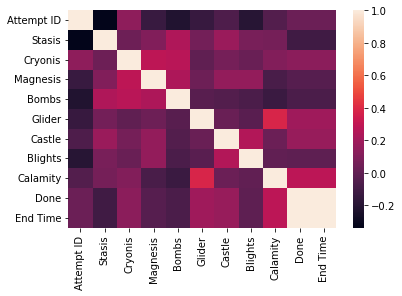

In [1177]:
sns.heatmap(df_segment_history_wNaN.corr())

## Analysing Segment History (without NaN values)

In [1175]:
df_segment_history_woNaN.describe()

,Attempt ID,Stasis,Cryonis,Magnesis,Bombs,Glider,Castle,Blights,Calamity,Done,End Time
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,915.861538,272.467538,212.928769,165.710615,164.017231,116.115692,371.776923,206.599846,165.065077,162.228923,1999.139538
std,529.011043,14.891610,18.339722,18.614194,23.513167,29.393495,173.828997,46.553822,89.689226,22.922809,244.970667
min,47.000000,253.590000,198.910000,143.240000,143.510000,99.080000,233.400000,183.320000,106.480000,155.220000,1725.500000
25%,589.000000,263.010000,202.850000,153.650000,150.760000,101.590000,295.570000,193.210000,132.380000,156.040000,1855.740000
50%,986.000000,268.980000,202.850000,160.630000,154.950000,107.680000,323.180000,197.380000,138.560000,157.320000,1939.700000
75%,1069.000000,275.620000,214.260000,173.830000,167.300000,117.220000,388.790000,201.320000,150.790000,159.080000,2039.230000
max,2051.000000,353.970000,279.020000,243.920000,278.100000,283.350000,1454.450000,509.810000,537.420000,328.690000,3270.030000


<AxesSubplot:>

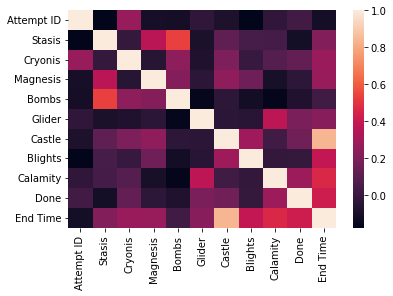

In [1176]:
sns.heatmap(df_segment_history_woNaN.corr())

Stuff to think about

1. Machine Learning
	-> End time predictions on a timeseries
	->

2. Probability distributions and statistics (in R)
	-> Chance of pb i.e. given x splits and their respective times
	   what is the P(x1 + ... + xn <= pb)
	-> Fit segments to a probability distribution and optimise fit

3. Simple visualisations

4. Combine collection of all of my splits for runner improvement analysis

Keep dates, can combine the data frames to then include dates in both (with nan,  without nan) data frames in case we choose to use them. Requires converting to date time with pd.to_datetime(column, format=%D %m %y %H:%M:%S) 01 Feb 20 18:42:29	

https://strftime.org/